In [332]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [333]:
# Read the data
df = pd.read_csv('bmi.csv')

In [334]:
from sklearn.preprocessing import LabelEncoder

# Encoding data to numerical values
le = LabelEncoder()

for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = le.fit_transform(df[c])
    else:
        pass

# print(df.head())
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [335]:
# Get the shape of the data
df.shape

(500, 4)

In [336]:
# Check the data types of the variables
df.dtypes

Gender    int32
Height    int64
Weight    int64
Index     int64
dtype: object

In [337]:
df.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.490000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,0.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


In [338]:
# Check missing values
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [339]:
# Get the most important features
df.corr()

,Gender,Height,Weight,Index
Gender,1.000000,-0.017677,0.009523,0.028786
Height,-0.017677,1.000000,0.000446,-0.422223
Weight,0.009523,0.000446,1.000000,0.804569
Index,0.028786,-0.422223,0.804569,1.000000


<AxesSubplot: >

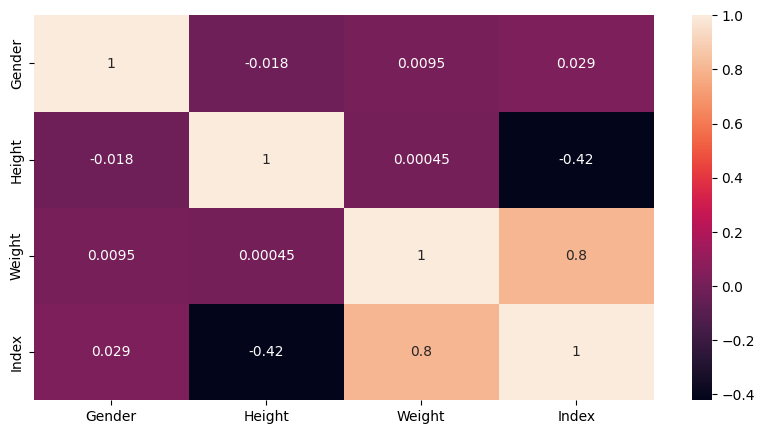

In [340]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [341]:
# Only get the most correlated features
df = df[['Height', 'Weight']]

In [342]:
# Show the first 5 rows of the data
df.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61


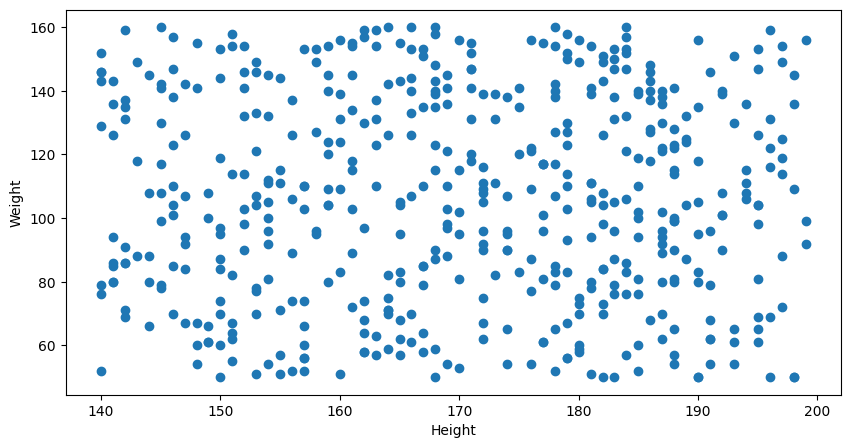

In [343]:
# Plot the data
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

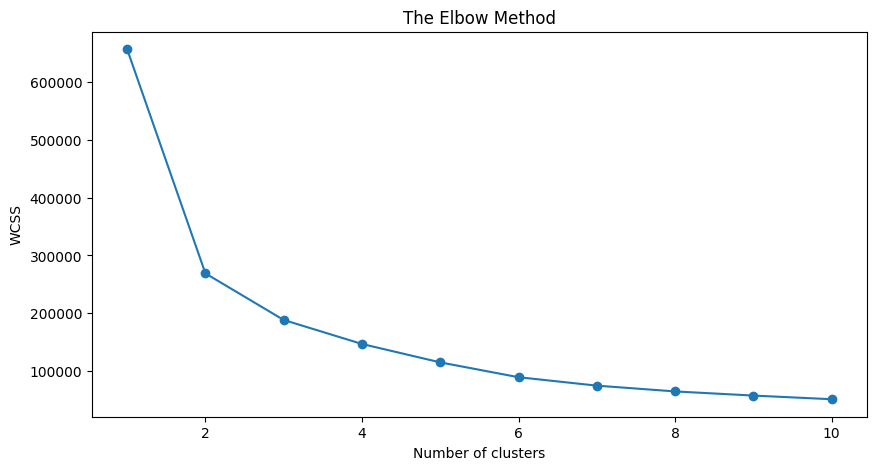

In [344]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [345]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

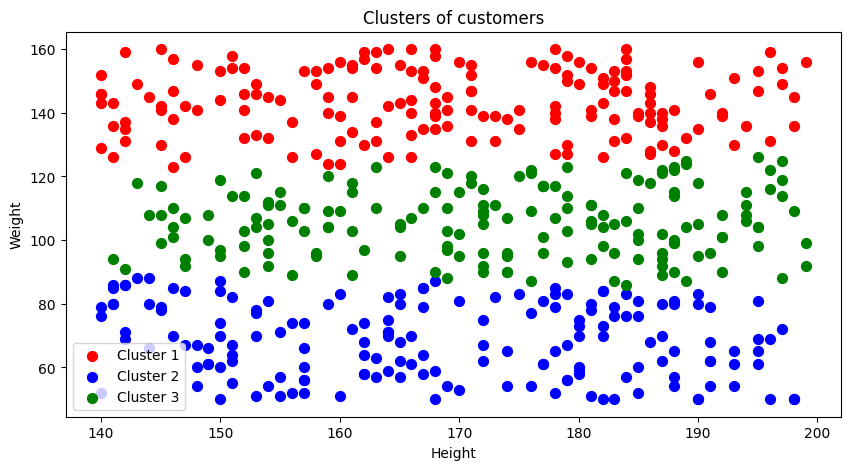

In [346]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['Height'], df[y_kmeans == 0]['Weight'], s=50, c='red', label='Cluster 1')
plt.scatter(df[y_kmeans == 1]['Height'], df[y_kmeans == 1]['Weight'], s=50, c='blue', label='Cluster 2')
plt.scatter(df[y_kmeans == 2]['Height'], df[y_kmeans == 2]['Weight'], s=50, c='green', label='Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [347]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [348]:
# Show the first 5 rows of the data
df.head()

,Height,Weight,Cluster
0,174,96,2
1,189,87,2
2,185,110,2
3,195,104,2
4,149,61,1


In [349]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [350]:
df['Cluster'].unique()

array([2, 1, 0])

In [351]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))